<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/RNN/SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu -U

     |████████████████████████████████| 320.4MB 48kB/s 


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

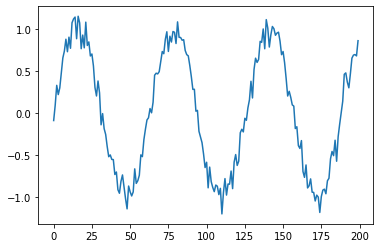

In [31]:
#synthetic dataset
noise = np.random.randn(200)*0.1
series = np.sin(0.1*np.arange(200)) + noise
plt.plot(series)

In [37]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape:",X.shape,"Y.shape",Y.shape)

X.shape: (190, 10, 1) Y.shape (190,)


In [38]:
#RNN Model
i = Input(shape = (T,1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))

In [39]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:],Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 58ms/step - loss: 6.3885 - val_loss: 0.4314
Epoch 2/80
3/3 [==============================] - 0s 8ms/step - loss: 0.3029 - val_loss: 0.1094
Epoch 3/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1499 - val_loss: 0.1614
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1105 - val_loss: 0.0469
Epoch 5/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0668 - val_loss: 0.0805
Epoch 6/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0759 - val_loss: 0.0526
Epoch 7/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0468 - val_loss: 0.0536
Epoch 8/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0504 - val_loss: 0.0598
Epoch 9/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0365 - val_loss: 0.0319
Epoch 10/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0350 - val_loss: 0.0393
Epoch 11/80
3/3 [====================

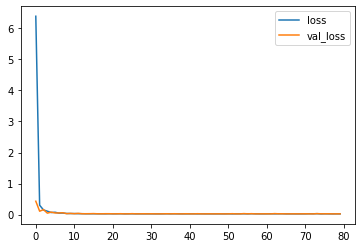

In [40]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [41]:
#Validate
target = Y[-N//2:]
predictions = []

last_x = X[-N//2]

while len(predictions) < len(target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0]
  predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

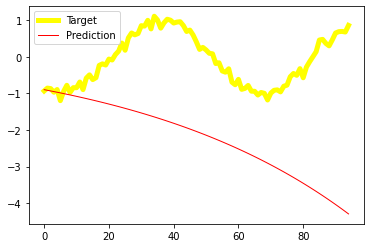

In [42]:
plt.plot(target,label="Target",linewidth=5,c='yellow')
plt.plot(predictions,label="Prediction",c='red',linewidth=1)
plt.legend()